<h1 style="text-align:center;">Correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>A correlation analysis computes the correlation coefficient (r).</p>
<p>r is one number, that shows the linear relationship between two variables.</p>
<p>r is standardized, it goes from -1 to 1. -1 means a perfect inverse relationship, 1 means a perfect correlation, 0 means no relation. </p>
<p>Correlation is not causation.</p>

<h1 style="text-align:center;">Covariance</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Correlation coefficient is covariance coefficient normalized.</p>
<p>Covariance is the same scale and same dimension as the data. Correlation is dimensionless.</p>
<p>We calculate covariance as:</p>

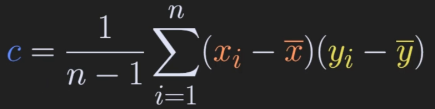

<p>And correlation as:</p>

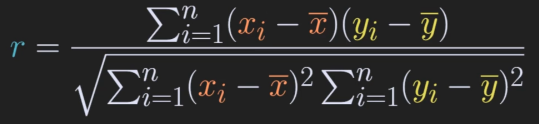

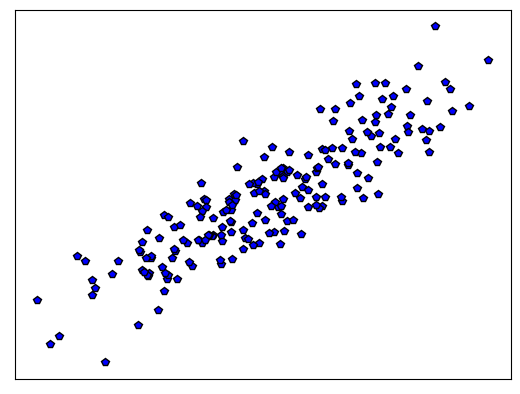

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

N = 200
x = np.random.randn(N)
y = np.random.randn(N)*.5 + x

plt.plot(x,y,'kp',markerfacecolor='b',markersize=6)
plt.xticks([])
plt.yticks([])
plt.show()

In [2]:
# compute covariance
# method 1
meanX = np.mean(x)
meanY = np.mean(y)

covar1 = 0
for i in range(N):
    covar1 += (x[i]-meanX)*(y[i]-meanY)
covar1 = covar1/(N - 1)

# method 2
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N - 1)

# method 3
covar3 = np.cov(np.vstack((x,y)))

covar = [covar1, covar2, covar3]

for i in range(len(covar)):
    print(f'covar{i+1}: {covar[i]}')

covar1: 1.0192177450286117
covar2: 1.0192177450286113
covar3: [[1.0607937  1.01921775]
 [1.01921775 1.26122409]]


In [3]:
# compute correlation

# method 1
correlationNumerator   = sum( (x-meanX) * (y-meanY) )
correlationDenominator = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = correlationNumerator / np.sqrt(correlationDenominator)

# method 2
corr2 = np.corrcoef(np.vstack((x,y)))

corr = [corr1,corr2]
for i in range(len(corr)):
    print(f'corr{i+1}: {corr[i]}')

corr1: 0.8811612318727973
corr2: [[1.         0.88116123]
 [0.88116123 1.        ]]


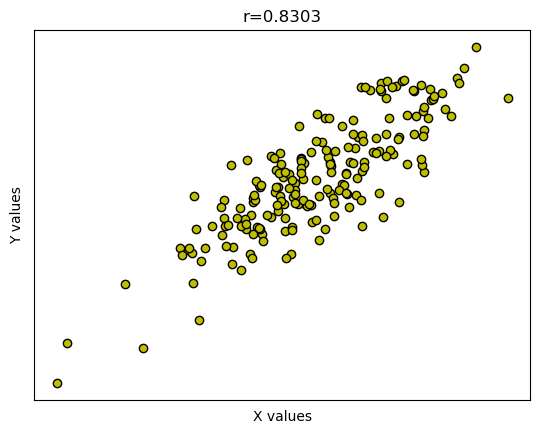

In [4]:
# data with specified correlation
N = 200
r = .8

x = np.random.randn(N)
y = np.random.randn(N)
y = x*r + y*np.sqrt(1-r**2)

plt.plot(x,y,'ko',markerfacecolor='y',markersize=6)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xticks([])
plt.yticks([])
plt.title(f'r={np.round(np.corrcoef(x,y)[0,1],4)}')
plt.show()

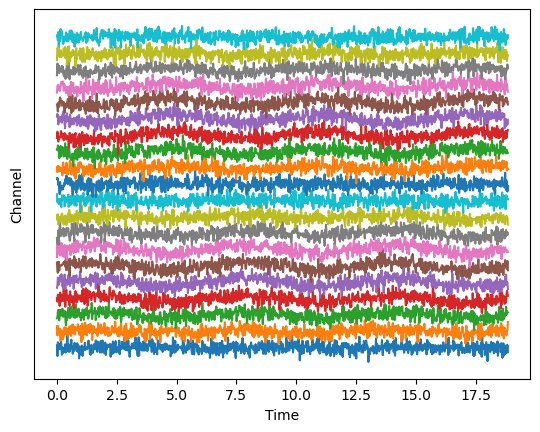

In [5]:
# correlation matrix
N = 1000
M = 20
t = np.linspace(0,6*np.pi,N)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]

data = data + np.random.randn(M,N)

for i in range(M):
    plt.plot(t,data[i,:]+i*4)

plt.yticks([])
plt.xlabel('Time')
plt.ylabel('Channel')
plt.show()

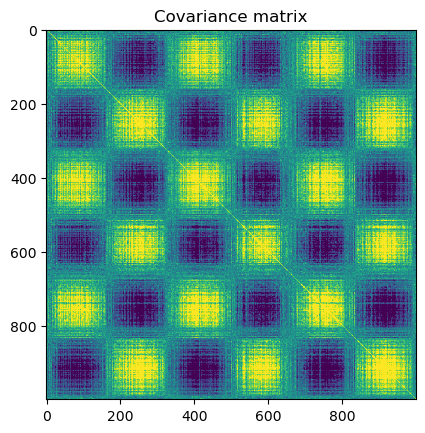

In [6]:
covarianceMatrix = np.cov(data.T)
plt.imshow(covarianceMatrix,vmin=-.5,vmax=.5)
plt.title('Covariance matrix')
plt.show()

<h1 style="text-align:center;">Spearman correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>The correlation discussed so far is Pearson correlation. It is fine for roughly normally distributed data. Outliers can make it produce unreally small values, and nonlinear relationships can make it produce unreally large values. For other cases, Spearman correlation. It is not sensitive to outliers.</p>
<p>We transform both variables to rank, and compute Pearson correlation for the ranks. P-value is the same as with Pearson correlation.</p>

<h1 style="text-align:center;">Fisher-Z transformation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Correlations are uniformly distributed. If we calculate a lot of correlation coefficients and want to do some secondary analysis of them, we need a way to make them normally distributed. The formula is: </p>
<p>z = 0.5 * ln((1+r)/(1-r))</p>

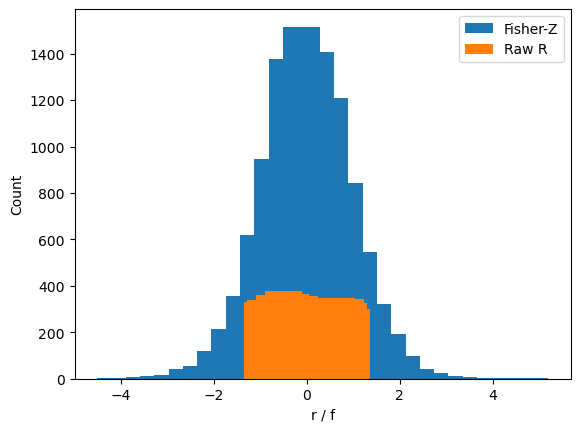

In [12]:
N = 10_000
r = 2 * np.random.rand(N) - 1
z = np.arctanh(r)

for data in [z, r]:
    y,x = np.histogram(data,30)
    x = (x[1:] + x[:-1]) / 2
    plt.bar(x,y)

plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(['Fisher-Z','Raw R'])
plt.show()

<h1 style="text-align:center;">Kendall correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>It is used for ordinal data. Example: Education level of high school, university, master's degree. It is categoric and sortable.</p>

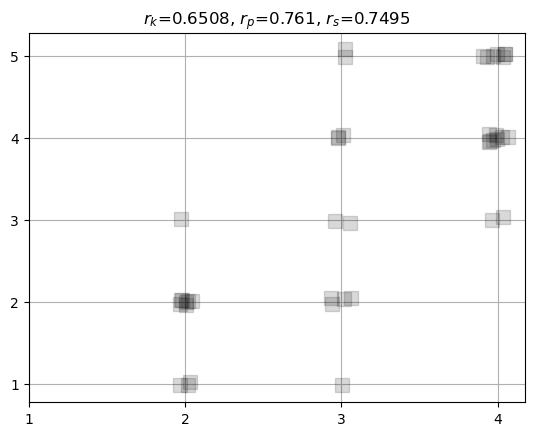

In [32]:
N = 40
docuRatings = np.random.randint(low=1,high=6,size=N)
educationLevel = np.ceil((docuRatings + np.random.randint(low=1,high=5,size=N)) / 9 * 4)

correlation = {}
correlation['kendalltau'] = stats.kendalltau(educationLevel,docuRatings)[0]
correlation['pearson'] = stats.pearsonr(educationLevel,docuRatings)[0]
correlation['spearman'] = stats.spearmanr(educationLevel,docuRatings)[0]

plt.plot(educationLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markerfacecolor=[0,0,0,.15],markersize=10)
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.grid()
plt.title('$r_k$=%g, $r_p$=%g, $r_s$=%g'%(np.round(correlation['kendalltau'],4), np.round(correlation['pearson'],4), np.round(correlation['spearman'],4)))
plt.show()

<h1 style="text-align:center;">Cosine similarity</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Uses the cos function to determine the relationship. Cos function goes from -1 to 1 just like correlations.</p>